In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore')

In [161]:
data=pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')


In [162]:
data.sample(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
7431,1.237650e+18,195.715344,67.422482,19.59255,17.57385,16.54240,16.11305,15.75520,1412,301,4,196,5.574600e+17,GALAXY,0.109346,495,51988,509
8398,1.237650e+18,130.388728,1.034946,18.29959,16.99849,16.51148,16.33965,16.24380,1239,301,6,67,8.390440e+18,STAR,0.000427,7452,56745,837
1212,1.237650e+18,146.020908,0.733552,17.41963,15.34520,14.35107,13.86729,13.50864,756,301,5,202,2.996160e+17,GALAXY,0.036177,266,51630,461
2828,1.237650e+18,156.393633,1.055952,19.35139,17.96256,17.31813,16.96556,16.70910,756,301,6,271,5.675220e+17,GALAXY,0.096640,504,52316,248
3262,1.237650e+18,132.921631,0.572478,18.90407,17.14394,16.33239,15.95892,15.67031,1239,301,5,84,5.258040e+17,GALAXY,0.051095,467,51901,33


In [163]:
data.shape

(10000, 18)

In [164]:
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [165]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [166]:
# c=data.corr()
# plt.figure(figsize = (15,10))
# sns.heatmap(c, annot=True)
# plt.show()

In [167]:
data=data.drop('rerun', axis=1)

In [168]:
print('Total Number of Instances',data['class'].shape[0])
print("Total number of instances with class 'STAR' ", data[data['class']=='STAR'].shape[0])
print("Total number of instances with class 'GALAXY' ", data[data['class']=='GALAXY'].shape[0])
print("Total number of instances with class 'QSO' ", data[data['class']=='QSO'].shape[0])

Total Number of Instances 10000
Total number of instances with class 'STAR'  4152
Total number of instances with class 'GALAXY'  4998
Total number of instances with class 'QSO'  850


In [169]:
X = data.drop('class',axis=1)
y = data['class']
X.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
182,1.237650e+18,221.163280,0.483958,17.88442,16.96119,16.64287,16.53269,16.48384,752,5,518,3.303510e+18,0.000032,2934,54626,432
9602,1.237650e+18,170.639748,1.142539,19.49440,17.54192,16.61114,16.17352,15.83358,756,6,366,3.153780e+17,0.073216,280,51612,460
7334,1.237650e+18,239.954171,52.750206,17.40667,15.65701,14.89114,14.51393,14.20178,1345,6,561,6.992670e+17,0.042765,621,52055,302
2496,1.237650e+18,172.343088,-1.035724,18.76935,16.82972,15.93489,15.51074,15.19731,756,1,377,3.164050e+17,0.077272,281,51614,99
7487,1.237650e+18,206.163116,0.040274,19.33829,17.45401,16.51886,16.11592,15.76633,752,4,418,3.367970e+17,0.088863,299,51671,556


In [170]:
from sklearn.preprocessing import LabelEncoder
class_encoder=LabelEncoder()
y=class_encoder.fit_transform(y)


In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [173]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [174]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(X_test)

print(accuracy_score(y_predict,y_test))

0.9896969696969697


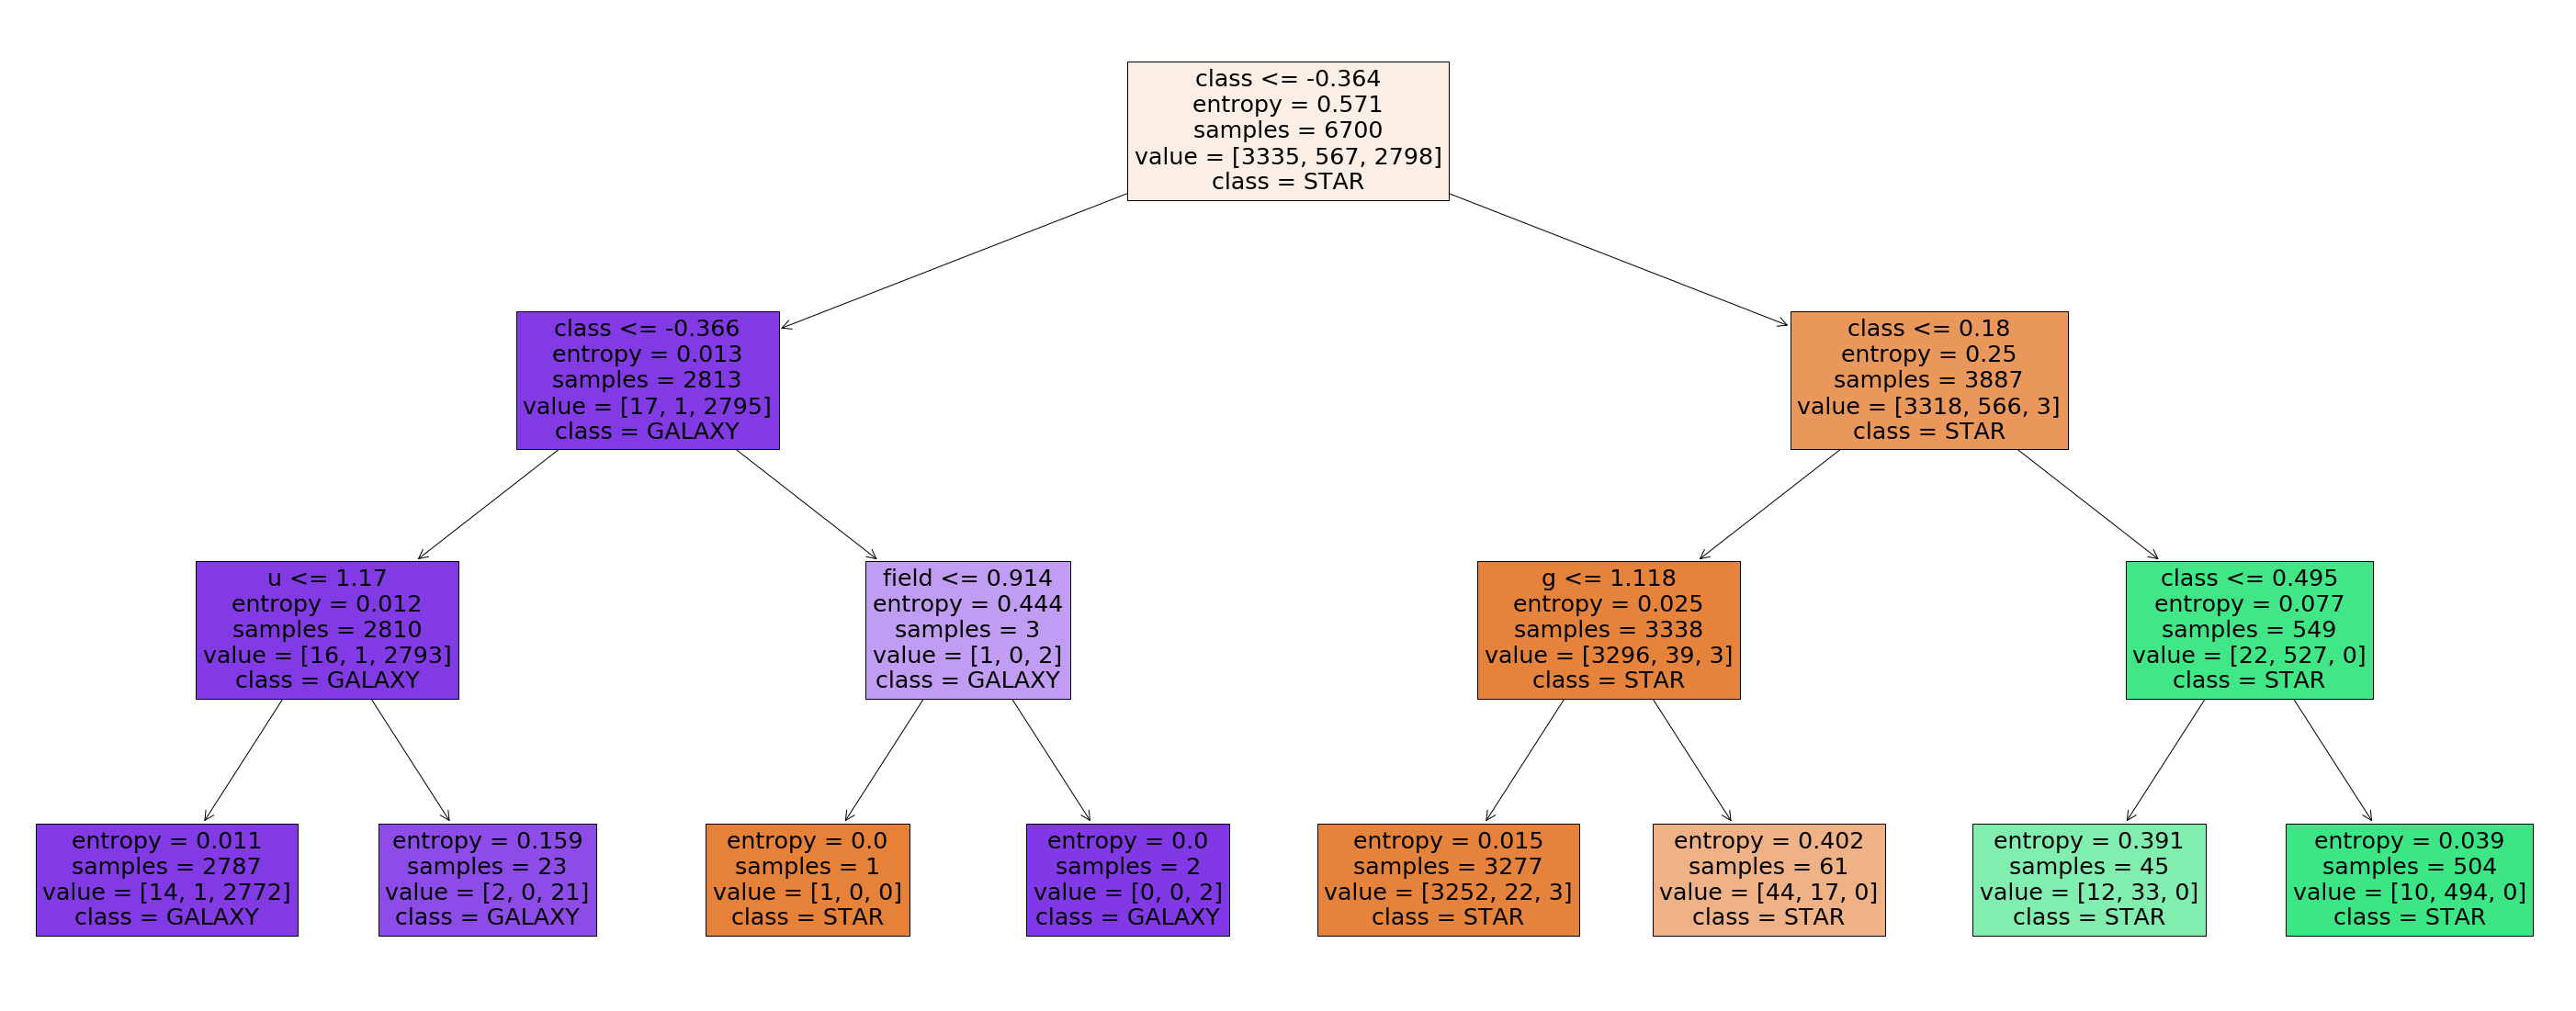

In [175]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(model, feature_names=data.columns, class_names=data['class'],filled=True)

In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_predict,y_test))

[[1651   19    1]
 [   6  264    0]
 [   6    0 1353]]
